# Autovalores em ecologia
#### Uma aplicação interessante da álgebra linear são modelos de população matricial, amplamente utilizados na ecologia e em problemas demográficos. Um tipo de modelo considera a distribuição etária da fertilidade e sobrevivência em uma população animal ou vegetal. Vamos ver como isso ocorre em um estudo de caso sobre coelhos.

##### Referência: Álgebra Linear com aplicações / Anton Howard e Chris Rorres; trad. Claus Ivo Doering. - 8. ed. - Porto Alegre: Bookman, 2001.

|**Em uma população de coelhos:**|
|:--------------------:|
|1-)metade dos coelhos recém-nascidos sobrevivem no primeiro ano de vida;|
|2-)metade dos coelhos sobrevivem no segundo ano de vida;|
|3-)os coelhos vivem no máximo até três anos;| 
|4-)coelhos produzem 0, 6, 8 outros coelhos no primeiro, segundo e terceiro anos, respectivamente.|

Sejam $X_{t}$, $Y_{t}$ e $Z_{t}$ a quantidade de coelhos no período de 0, 1 e 2 anos de idade, respectivamente, em um certo período t de tempo após o início do estudo, podemos definir:

$X_{t+1} = 0X_{t} + 6Y_{t} + 8Z_{t}$

$X_{t+1} = 1/2X_{t} + 0Y_{t} + 0Z_{t}$

$X_{t+1} = 0X_{t} + 1/2Y_{t} + 0Z_{t}$

As coordenadas do sistema podem ser definidos em uma matriz L:


$$L = \begin{bmatrix}
          0 & 6 & 8 \\
          0.5 & 0 & 0 \\
          0 & 0.5 & 0 \\
          \end{bmatrix}$$

In [1]:
# importando a biblioteca de funções do Python numpy
import numpy as numpy 
# importando a biblioteca de funções do Python matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
# definindo a matriz L
L = numpy.array([[0,6,8], [0.5,0,0], [0,0.5,0]]) 

In [3]:
#imprimindo a matriz
print("{}".format(L))

[[0.  6.  8. ]
 [0.5 0.  0. ]
 [0.  0.5 0. ]]


Essa matriz representa a transição etária ano após ano. Multiplique essa matriz pelo vetor população para obter a população estruturada por idade no próximo ano. Vamos escrever um pouco de código em Python para ver a população em cada faixa etária crescer mais, ano após ano (conceitos usados exigem conhecimentos em Cadeias de Markov, em que um sistema muda para outro).

|**Seja p a população inicial de coelhos, podemos especular:**|
|:-----------:|
|1-) 25 coelhos na idade 0;|
|2-) 10 coelhos na idade 1;|
|3-) 5 coelhos na idade 2;|

In [4]:
# definindo um array p, p = população inicial de coelhos
p = numpy.array([25, 10, 5]) 

In [5]:
# imprime a população inicial de coelhos
print("A população inicial de coelhos é: {}; para 0 ano, 1 ano e 2 anos, respectivamente.".format(p))

A população inicial de coelhos é: [25 10  5]; para 0 ano, 1 ano e 2 anos, respectivamente.


In [6]:
# função que estima a população de coelhos após x anos seguidos
def novaPopulacao(anos):
    
    # definindo a população inicial de coelhos
    populacao = numpy.array([25, 10, 5]) 
    # realiza 10 multiplicações sucessivas considerando o vetor população anterior em cada estado
    # estrutura for que varia de 0 até o ano de parada que o usuário digitar
    for indice in range (0, anos):
        # define a nova matriz população recursivamente
        populacao = numpy.dot(L,populacao) 
    
    # retorna como resultado da função a nova população após x anos
    return populacao

In [7]:
# função que imprime um gráfico de Pizza para a população de coelhos
def graficoPizza(populacao, titulo):
    
    # criando as etiquetas para o gráfico
    labels = '0 ano', '1 ano', '2 anos'

    # criando a área de plotagem
    fig1, ax1 = plt.subplots()

    # criando o gráfico
    ax1.pie(populacao, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)

    # com essa opção, o gráfico ficará em círculo
    ax1.axis('equal')

    # título do gráfico
    plt.title(titulo)

    # mostra o gráfico
    plt.show()
    
    # função não retorna nada especifico, ela é do tipo void
    return None

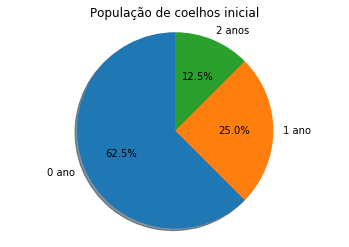

In [8]:
# chama a função que imprime o gráfico de pizza
graficoPizza(novaPopulacao(anos = 0), titulo = "População de coelhos inicial") 

O nosso sistema agora vai sofrer uma mudança de estado. Vamos verificar essa mudança de estado após ter se passado 1 ano, provavelmente a população vai ter uma nova modelagem, baseado nas características de vida dos coelhos e na população que tinha no ano anterior.

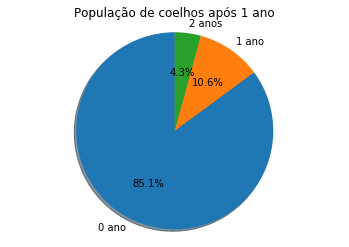

In [9]:
# chama a função que imprime o gráfico de pizza
graficoPizza(novaPopulacao(anos = 1), titulo = "População de coelhos após 1 ano") 

Qual será o comportamento da população daqui a 10 anos? Bom, para esse fim, vamos fazer a mesma ideia de multiplicação entre matrizes, mas a cada ano posterior, devemos considerar a matriz população do ano anterior, de forma recursiva.

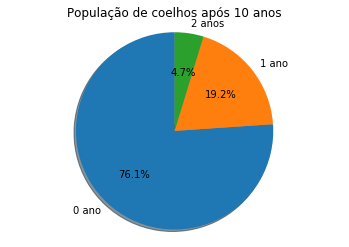

In [10]:
# chama a função que imprime o gráfico de pizza
graficoPizza(novaPopulacao(anos = 10), titulo = "População de coelhos após 10 anos") 

Daqui a 100 anos, teremos uma outra população de coelhos:


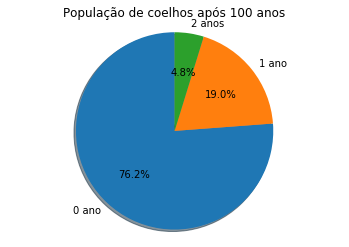

In [11]:
# chama a função que imprime o gráfico de pizza
graficoPizza(novaPopulacao(anos = 100), titulo = "População de coelhos após 100 anos") 

Após um certo período de tempo, em particular quando o mesmo tende ao infinito, é fácil perceber que os vetores-estado que indicam a razão ou porcentagem de indivíduos para cada idade de coelhos em um certo tempo, convergem a um vetor fixo à medida que o número de observações cresce, e isso é bem definido na teoria de Cadeias de Markov.

Agora vamos pegar os autovalores e autovetores do matriz L e observar algo importante.

In [12]:
#determinando autovalores e autovetores
autovalores,autovetores = numpy.linalg.eig(L) 

In [13]:
# imprimindo os autovalores
print("{}".format(autovalores))

[ 2.         -0.99999998 -1.00000002]


In [14]:
# imprimindo os autovetores
print("{}".format(autovetores))

[[-0.96836405  0.87287156 -0.87287156]
 [-0.24209101 -0.43643579  0.43643578]
 [-0.06052275  0.2182179  -0.21821788]]


Vamos analisar o autovetor relacionado ao autovalor 2:

In [15]:
# deletando o autovetor associado ao -1, que não nos importa
autovetores = numpy.delete(autovetores,1,axis=1)
autovetores = numpy.delete(autovetores,1,axis=1)

In [16]:
# multiplicando por um escalar para melhor visualização
-16.52271 * autovetores

array([[15.99999841],
       [ 3.9999996 ],
       [ 0.9999999 ]])

Isso indica que a cada ano a população dobrará (autovalor = 2) obedecendo a razão 16:4:1 para 0 ano, 1 ano e 2 anos de idade dos coelhos, respectivamente (autovetor associado ao autovalor 2).

Agora, vamos observar melhor um outro estilo de gráfico que mostra a relação ao longo dos anos.

In [17]:
# definindo a função que imprime um outro estilo de gráfico, mais abrangente
def grafico(anos, titulo):
    
    # definindo a matriz L
    L = numpy.array([[0,6,8], [0.5,0,0], [0,0.5,0]]) 
    
    # quantidade inicial de indivíduos com 0, 1 e 2 anos de idade, respectivamente
    p = numpy.array([25, 10, 5]) 
    
    # tempo de anos decorridos (nesse caso serão 2 ANOS decorridos, subtraia 1 do números de anos)
    N = anos + 1 

    # inicializa uma matriz de zeros com as linhas indicando os anos decorridos e colunas a 
    # população etária de coelhos
    pn = numpy.zeros((N, len(p)))
    # adiciona a população inicial a matriz
    pn[0,:] = p.copy()

    # estrutura de repetição, que inicia um ano após a população inicial até o ano final especificado
    for i in range(1,N):
        # adiciona a cada linha subsequente a mudança de estado da população par cada faixa etária dos 
        # coelhos, entre as colunas
        pn[i,:] = L.dot(pn[i-1,:])  

    # define a dimensão do gráfico
    plt.figure(figsize=(10,5))
    # plota o gráfico da primeira coluna, responsável pelo avanço da população de coelhos com 0 ano 
    # de idade
    plt.plot(pn[:,0],)
    # plota o gráfico da segunda coluna, responsável pelo avanço da população de coelhos com 1 ano 
    # de idade
    plt.plot(pn[:,1],)
    # plota o gráfico da terceira coluna, responsável pelo avanço da população de coelhos com 2 ano
    # de idade
    plt.plot(pn[:,2],)
    # título do eixo x
    plt.xlabel('Anos')
    # título do gráfico
    plt.title(titulo);
    
    # indica que a função não retorna nenhum tipo de dado, é do tipo void
    return None

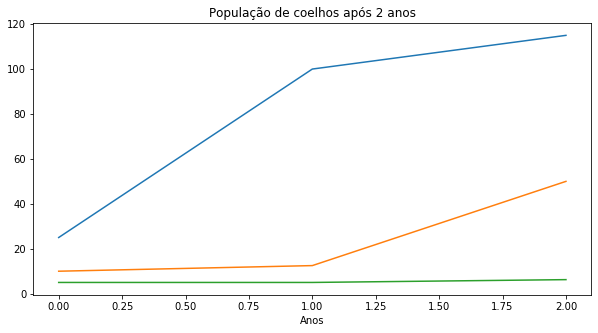

In [18]:
# chama a função que plota o gráfico
grafico(anos = 2, titulo = "População de coelhos após 2 anos") 

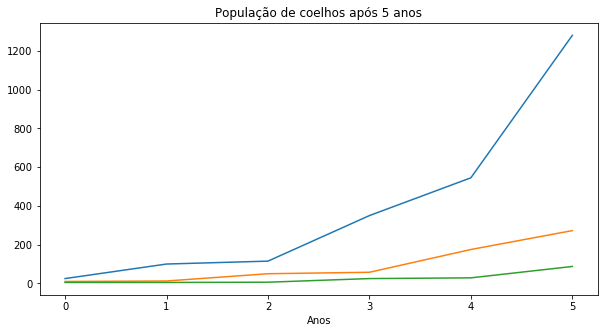

In [19]:
# chama a função que plota o gráfico
grafico(anos = 5, titulo = "População de coelhos após 5 anos")

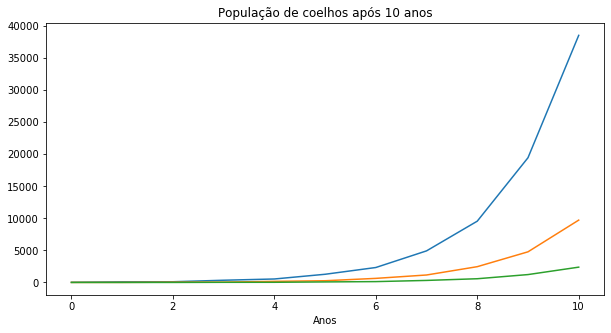

In [20]:
# chama a função que plota o gráfico
grafico(anos = 10, titulo = "População de coelhos após 10 anos")

Vejam que a razão entre faixas etárias de coelhos, após vários anos, começou a manter uma proporção constante, dado que o sistema não sofreu nenhum tipo de desequilíbrio externo. Portanto, Álgebra Linear é uma disciplina extremamente eficiente para resolver problemas reais, por esse motivo, ela revolucionou e vem revolucionando o mundo ao nosso redor, suas aplicações nos trouxeram comodidade por estar presente em inúmeras tecnologias do dia a dia e, saber trabalhar com ela, nos permite uma melhor compreensão de inúmeros problemas na engenharia e nos torna diferenciados como profissionais.

### Alguma Dúvida? Entre em Contato Comigo:

- [Me envie um e-mail](mailto:alysson.barbosa@ee.ufcg.edu.br);